<p style = "font-size : 42px; color : 	#000000 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #C0C0C0; border-radius: 5px 5px;"><strong>COVID-19 Impact on Digital Learning</strong></p>

<img src="https://media.springernature.com/m685/springer-static/image/art%3A10.1038%2Fs41928-020-00534-0/MediaObjects/41928_2020_534_Figa_HTML.png" alt="Online education in the post-COVID era | Nature Electronics" jsname="HiaYvf" jsaction="load:XAeZkd;" class="n3VNCb" data-noaft="1" style="margin-left: 5%; float: center;  border:5px solid ; width:90%; height : 100%;">

<a id = '0.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Table of Contents</strong></p> 

* [Details about the dataset](#1.0)
* [Importing libraries](#2.0)
* [Importing dataset](#3.0)
* [Basic Data Exploration(Understanding the Dataset)](#4.0)
* [ Drop not related values](#5.0)
* [Drop missing values](#6.0)
* [delete data duplicated](#7.0)
* [Drop missing values](#6.0)
* [Exploratory Data Analysis (EDA)](#8.0)

<a id = '1.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Details about the dataset</strong></p>

The data contains 7 Columns and 233 Rows

The Link of the data => https://www.kaggle.com/c/learnplatform-covid19-impact-on-digital-learning/data

* district_id	The unique identifier of the school district
* state	The state where the district resides in
* locale	NCES locale classification that categorizes U.S. territory into four types of areas: City, * Suburban, Town, and Rural. See Locale Boundaries User's Manual for more information.
* pct_black/hispanic	Percentage of students in the districts identified as Black or Hispanic based on 2018-19 NCES data
* pct_free/reduced	Percentage of students in the districts eligible for free or reduced-price lunch based on 2018-19 NCES data
* countyconnectionsratio	ratio (residential fixed high-speed connections over 200 kbps in at least one direction/households) based on the county level data from FCC From 477 (December 2018 version). See FCC data for more information.
* pptotalraw	Per-pupil total expenditure (sum of local and federal expenditure) from Edunomics Lab's National Education Resource Database on Schools (NERD$) project. The expenditure data are school-by-school, and we use the median value to represent the expenditure of a given school district

<a id = '2.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Importing libaraies</strong></p>

In [ ]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

<a id = '3.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Importing dataset</strong></p>

In [ ]:
data = pd.read_csv('../input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv')

<a id = '4.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Basic Data Exploration(Understanding the Dataset)</strong></p>

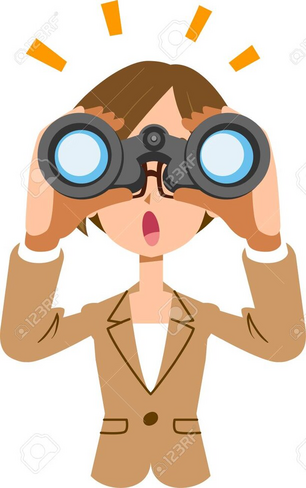

#### We will check the below things:

* head of the dataset
* the shape of the dataset
* datatypes for every column 
* summary of the dataset
* Get rid of garbage

In [ ]:
data.head()

In [ ]:
# Take a sample of 5
data.sample(5)

In [ ]:
data.shape

In [ ]:
#info() is used to check the Information about the data and the datatypes of each respective attribute.
data.info() 

In [ ]:
#The described method will help to see how data has been spread for numerical values.
# We can clearly see the minimum value, mean values, different percentile values, and maximum values.
data.describe(include='all').T

In [ ]:
data.columns

#### Garbage in Garbage out
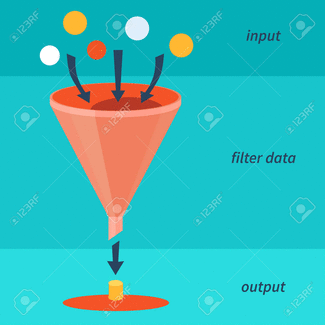

* Drop not related values.
* Drop missing values. 
* Drop invalid values.
* Drop outlier.

<a id = '5.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong> Drop not related values</strong></p>


In [ ]:
data = data.drop(["district_id"],axis=1)      
data.shape

<a id = '6.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Drop missing values</strong></p>

In [ ]:
null = pd.DataFrame({'Null Values' : data.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (data.isna().sum().sort_values(ascending=False)) / (data.shape[0]) * (100)})
null

In [ ]:
null_counts = data.isna().sum().sort_values(ascending=False)/len(data)
plt.figure(figsize=(15,5))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

* I Clean missing values using Random Value Imputation Because This the best way to To maintain distrbuation For each feature.

In [ ]:
### lets create a function so that I can easily do it for all features
def Random_value_imputation(feature):
    random_sample=data[feature].dropna().sample(data[feature].isnull().sum())               
    random_sample.index=data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature]=random_sample

In [ ]:
for col in data:
    Random_value_imputation(col)

In [ ]:
null = pd.DataFrame({'Null Values' : data.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (data.isna().sum().sort_values(ascending=False)) / (data.shape[0]) * (100)})
null

In [ ]:
null_counts = data.isna().sum().sort_values(ascending=False)/len(data)
plt.figure(figsize=(15,5))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

<a id = '7.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>delete data duplicated</strong></p>

In [ ]:
duplicate = data.duplicated()
print(duplicate.sum())

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
duplicate = data.duplicated()
print(duplicate.sum())

<a id = '8.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Exploratory Data Analysis (EDA)</strong></p>

###  what is EDA ?
is an approach for data analysis that emeploys a variety of technics (mostly graphical) to  
*  maximize insight into a dataset
*   uncover underlying structure     
*   extract important variables      
*   answer questions    

### EDA Checklist
1. What question(s) are you trying to solve ? 
2. What kind of data do you have and how do you treat different types? 
3. What do you get after visualize your data?
4. What is your observation ?

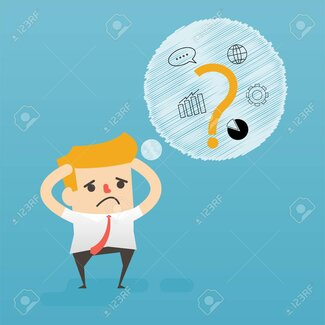

### unique values of coulmns

In [ ]:
for col in data:
    print('{} has {} values  '.format(col, data[col].unique()))
    print('\n')

### Number of unique values of coulmns

In [ ]:
for col in data:
    print('{} has {} categories'.format(col, data[col].nunique()))

### distribution

In [ ]:
plt.figure(figsize=(20,20))
for i,feature in enumerate(data):
    plt.subplot(2,4,i+1)
    sns.countplot(data[feature]  , edgecolor=sns.color_palette("dark", 3))

## Visualization

In [ ]:
data['locale'].value_counts()

In [ ]:
data["locale"].value_counts() * 100 / len(data) 

In [ ]:
data["locale"].value_counts().plot.pie(autopct = "%1.1f%%")

In [ ]:
plt.rcParams['figure.figsize'] = (12,8)
sns.countplot(x='locale',data=data)
plt.xticks(rotation=30)

In [ ]:
data['pp_total_raw'].value_counts()

In [ ]:
data["pp_total_raw"].value_counts() * 100 / len(data) 

In [ ]:
data["pp_total_raw"].value_counts().plot.pie(autopct = "%1.1f%%")

In [ ]:
plt.rcParams['figure.figsize'] = (12,8)
sns.countplot(x='pp_total_raw',data=data)
plt.xticks(rotation=30)

In [ ]:
data['state'].value_counts()

In [ ]:
data["state"].value_counts() * 100 / len(data) 

In [ ]:
plt.rcParams['figure.figsize'] = (30, 20)
data["state"].value_counts().plot.pie(autopct = "%1.1f%%")

In [ ]:
plt.rcParams['figure.figsize'] = (12,8)
sns.countplot(x='state',data=data)
plt.xticks(rotation=60)

In [ ]:
data['county_connections_ratio'].value_counts()

In [ ]:
data["county_connections_ratio"].value_counts() * 100 / len(data) 

In [ ]:
data["county_connections_ratio"].value_counts().plot.pie(autopct = "%1.1f%%")

In [ ]:
plt.rcParams['figure.figsize'] = (12,8)
sns.countplot(x='county_connections_ratio',data=data)
plt.xticks(rotation=30)

In [ ]:
data['pct_free/reduced'].value_counts()

In [ ]:
data["pct_free/reduced"].value_counts() * 100 / len(data) 

In [ ]:
data["pct_free/reduced"].value_counts().plot.pie(autopct = "%1.1f%%")

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='pct_free/reduced',data=data)
plt.xticks(rotation=30)

<p style = "font-size : 30px; color : 	#000000 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #C0C0C0; border-radius: 5px 5px;"><strong>If you found this notebook helpful or you just liked it , some upvotes would be very much appreciated - That will keep me motivated to update it on a regular basis</strong></p>
